<a href="https://colab.research.google.com/github/Freddy-94/Metaheuristics-practices/blob/main/Copia_de_Simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alfredo Bernal Luna
### Practice No. 1 "Simulated Annealing Algorithm".

# Definition of cost function:

Let $f : [0, \pi] ^n \to \mathbb{R}$ given by:

\begin{align}
        f(\mathbf{x}) = -\sum_{i=1}^n sin(x_{i})sin^{20}(i(\frac{x_{i}^{2}}{\pi})) 
\end{align}

In [1]:
import numpy as np
import math 

def cost_function(n, x):
  sum = 0
  for i in range(1, n+1):
    sum += (math.sin(x[i-1])) * (math.sin(i*(x[i-1]**2/math.pi))**20)
  fun_value = -sum
  return fun_value

# Test of the cost function:

**1.   Two real variables:**

In [2]:
cost_function(2, (2.20, 1.57))

-1.801140718473825

**2.   Five real variables:**

In [3]:
cost_function(5, (2.15, 3.021, 1.658, 0.894, 2.996))

-0.9050966125015453

**3.   Ten real variables:**

In [4]:
cost_function(10, (3.1315, 2.6548, 1.265, 0.264, 0.00156, 2.165, 3.125, 2.568, 1.698, 1.145))

-1.487883595148603

# "Cooling" functions for the algorithm (individual implementation):

**1.   Linear cooling:**

$ T_{k} = T_{k-1} - \beta $

In [5]:
def linear_cooling(last_tmp, beta):
    new_tmp = last_tmp - beta
    return new_tmp


**2.   Geometric cooling:**

$ T_{k} = \alpha * T_{k-1} $

In [6]:
def geometric_cooling(last_tmp, alpha):
    new_tmp = alpha * last_tmp
    return new_tmp

**3.   Logarithmic cooling:**

$ T_{k} = \frac{ln(k)}{ln(k+1)} * T_{k-1} $

In [7]:
def log_cool(iter, last_tmp):
    new_tmp = (math.log(iter)/math.log(iter+1))*last_tmp
    return new_tmp

**4.   Hybrid cooling:**

$ T_{k} = \begin{cases} 
      (\frac{k}{k+1}) * T_{k-1} & k \leq β \\
      \alpha * T_{k-1} & k > β 
   \end{cases}
$

In [8]:
def hybrid_cooling(iteration, alpha, beta, last_tmp):
    if iteration <= beta:
        new_tmp = (iteration/iteration+1)*last_tmp
    else:
        new_tmp = alpha * last_tmp
    return new_tmp

**5.   Exponential cooling:**

$ T_{k} = \frac{T_{k-1}}{1 + \beta T_{k-1}} $

In [9]:
def exp_cooling(beta, last_tmp):
    new_tmp = last_tmp/(1+(beta*last_tmp))
    return new_tmp

# Simulated annealing algorithm implementation

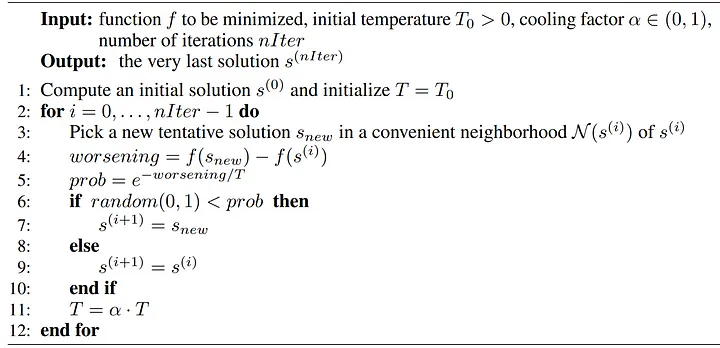

In [11]:
import numpy.random as rn
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl
from scipy import optimize       # to compare
import seaborn as sns

"""
Start of implementation of algorithm.
In our implementation, we must have a domain of the form: [a, b] x ... x [a, b], 
so that our algorithm works. 
"""

def random_start(n, interval):
    """ Generation of random point in the interval.
        limInf & limSup are the delimiting values that each variable can take;
        i.e., if the function has two real values, then, the domain of the 
        function will be [0, \pi] x [0, \pi]. Analogously, if the function has three
        real values, then, the domain of the function will be [0, \pi] x [0, \pi] x [0, \pi].
        This happen in general if n is the number of real variables that the function can
        take."""
    limInf, limSup = interval 
    rand_start = limInf + (limSup - limInf) * rn.random_sample((n,))
    return rand_start

def clip(x, interval):
    """Force each coordinate of the input vector, to be in its corresponding interval; i.e., 
        in this function the parameter 'x' is a scalar"""
    limInf, limSup = interval
    return max(min(x, limSup), limInf)

def random_neighbour(x, interval, fraction):
    """Move a little bit x, from the other coordinates."""
    rndm_neighbor_sol = []
    amplitude = (max(interval) - min(interval)) * fraction / 10.0
    for i in range(len(x)):  
        delta = (-amplitude/2.) + amplitude * rn.random() 
        rndm_neighbor_sol.append(clip(x[i] + delta, interval)) 
    return rndm_neighbor_sol

def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p

def annealing(n,
              interval,
              random_start,
              cost_function,
              random_neighbour,
              acceptance_probability,
              cooling_function,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = random_start(n, interval) # If n=2, then, state is a random number in the set [0, \pi] x [0, \pi]
    cost = cost_function(n, state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = cooling_function(fraction)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs